# Pricing exotic payoff with Monte Carlo methods

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import math
from barrier import *

In [2]:
plot_dir = r"plots/"

In [3]:
BM = fe.L4_BoxMuller(1)

In [4]:
def plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, save_path=None
):
    plt.figure()
    plt.title(title + f"path count = {nb_path}")
    plt.plot(x_axis[0], data1[0], label=data1[1], alpha=0.7, linewidth=1.5)
    plt.plot(x_axis[0], data2[0], label=data2[1], alpha=0.7, linewidth=1.5)
    if x1:
        plt.axvline(
            x=x1[0],
            color="darkblue",
            linestyle="--",
            label=x1[1],
            alpha=0.35,
            linewidth=1.5,
        )
    if x2:
        plt.axvline(
            x=x2[0],
            color="darkgreen",
            linestyle="--",
            label=x2[1],
            alpha=0.35,
            linewidth=1.5,
        )
    if x3:
        plt.axvline(
            x=x3[0],
            color="darkgreen",
            linestyle="--",
            label=x3[1],
            alpha=0.35,
            linewidth=1.5,
        )
    plt.legend()
    plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.3)
    plt.xlabel(x_axis[1])
    plt.ylabel(r"Option price")
    if save_path:
        plt.savefig(save_path)
    plt.show()

### Plot price against $S_0$

In [5]:
S0 = 100.0
r = 0.05
sigma = 0.2
T = 5.0
K = 100
m = 100
Bup = 130
Bdown = 70

# Knock out
DBKO_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, True, m, BM)
DBKO_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, True, m, BM)

# Knock in
DBKI_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, False, m, BM)
DBKI_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, False, m, BM)

In [6]:
# running analytics
path_count = 50000

KO_call_prices = []
KO_put_prices = []
KI_call_prices = []
KI_put_prices = []

S0_list = np.linspace(50, 150, 100)

for S0_i in S0_list:
    KO_call_prices.append(DBKO_call.price_S0(S0_i, path_count))
    KO_put_prices.append(DBKO_put.price_S0(S0_i, path_count))
    KI_call_prices.append(DBKI_call.price_S0(S0_i, path_count))
    KI_put_prices.append(DBKI_put.price_S0(S0_i, path_count))

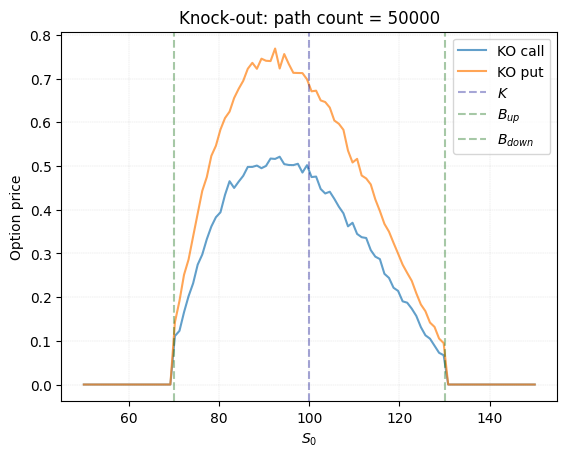

In [7]:
x_axis = [S0_list, r"$S_0$"]
data1 = [KO_call_prices, "KO call"]
data2 = [KO_put_prices, "KO put"]
x1 = [K, r"$K$"]
x2 = [Bup, r"$B_{up}$"]
x3 = [Bdown, r"$B_{down}$"]
nb_path = path_count
title = "Knock-out: "

plot_name = "KO_Price_as_S0.png"

plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, plot_dir + plot_name
)

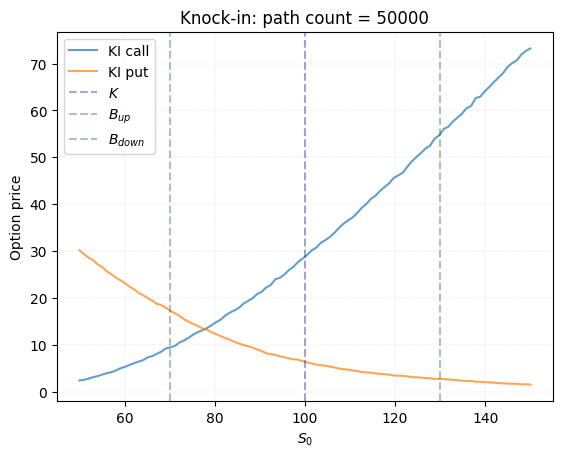

In [8]:
x_axis = [S0_list, r"$S_0$"]
data1 = [KI_call_prices, "KI call"]
data2 = [KI_put_prices, "KI put"]
x1 = [K, r"$K$"]
x2 = [Bup, r"$B_{up}$"]
x3 = [Bdown, r"$B_{down}$"]
nb_path = path_count
title = "Knock-in: "

plot_name = "KI_Price_as_S0.png"

plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, plot_dir + plot_name
)

### Plot price against $B_{up}$

In [9]:
S0 = 80
r = 0.05
sigma = 0.2
T = 5.0
K = 100.0
m = 100
Bup = 130
Bdown = 0

# Knock out
DBKO_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, True, m, BM)
DBKO_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, True, m, BM)

# Knock in
DBKI_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, False, m, BM)
DBKI_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, False, m, BM)

In [10]:
# running analytics
path_count = 50000

KO_call_prices = []
KO_put_prices = []
KI_call_prices = []
KI_put_prices = []

Bup_list = np.linspace(50, 150, 100)

for Bup_i in Bup_list:
    KO_call_prices.append(DBKO_call.price_B(Bup_i, Bdown, path_count))
    KO_put_prices.append(DBKO_put.price_B(Bup_i, Bdown, path_count))
    KI_call_prices.append(DBKI_call.price_B(Bup_i, Bdown, path_count))
    KI_put_prices.append(DBKI_put.price_B(Bup_i, Bdown, path_count))

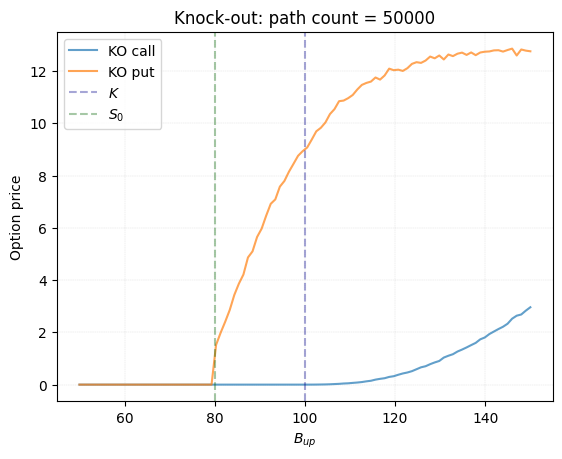

In [11]:
x_axis = [Bup_list, r"$B_{up}$"]
data1 = [KO_call_prices, "KO call"]
data2 = [KO_put_prices, "KO put"]
x1 = [K, r"$K$"]
x2 = [S0, r"$S_0$"]
x3 = None
nb_path = path_count
title = "Knock-out: "

plot_name = "KO_Price_as_Bup.png"

plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, plot_dir + plot_name
)

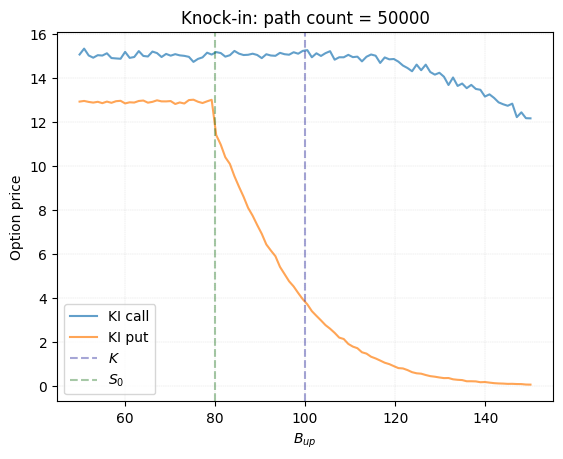

In [12]:
x_axis = [Bup_list, r"$B_{up}$"]
data1 = [KI_call_prices, "KI call"]
data2 = [KI_put_prices, "KI put"]
x1 = [K, r"$K$"]
x2 = [S0, r"$S_0$"]
x3 = None
nb_path = path_count
title = "Knock-in: "

plot_name = "KI_Price_as_Bup.png"

plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, plot_dir + plot_name
)

### Plot price against $K$

In [13]:
S0 = 100
r = 0.05
sigma = 0.2
T = 5.0
K = 100.0
m = 100
Bup = 130
Bdown = 60

# Knock out
DBKO_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, True, m, BM)
DBKO_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, True, m, BM)

# Knock in
DBKI_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, False, m, BM)
DBKI_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, False, m, BM)

In [14]:
# running analytics
path_count = 50000

KO_call_prices = []
KO_put_prices = []
KI_call_prices = []
KI_put_prices = []

K_list = np.linspace(50, 150, 100)

for K_i in K_list:
    KO_call_prices.append(DBKO_call.price_K(K_i, path_count))
    KO_put_prices.append(DBKO_put.price_K(K_i, path_count))
    KI_call_prices.append(DBKI_call.price_K(K_i, path_count))
    KI_put_prices.append(DBKI_put.price_K(K_i, path_count))

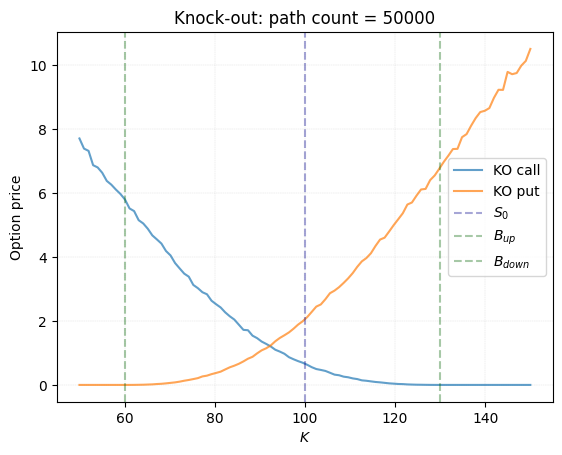

In [15]:
x_axis = [K_list, r"$K$"]
data1 = [KO_call_prices, "KO call"]
data2 = [KO_put_prices, "KO put"]
x1 = [S0, r"$S_0$"]
x2 = [Bup, r"$B_{up}$"]
x3 = [Bdown, r"$B_{down}$"]
nb_path = path_count
title = "Knock-out: "

plot_name = "KO_Price_as_K.png"

plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, plot_dir + plot_name
)

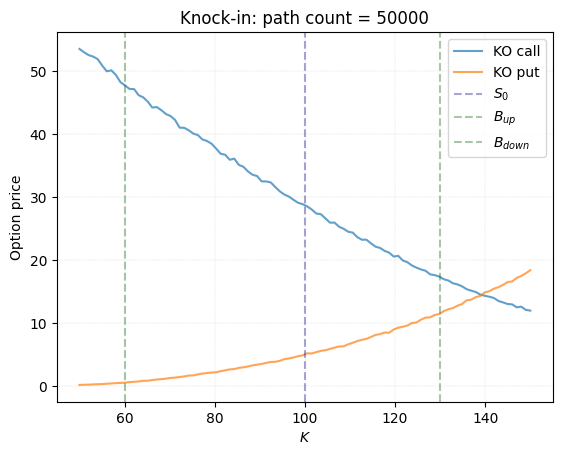

In [16]:
x_axis = [K_list, r"$K$"]
data1 = [KI_call_prices, "KO call"]
data2 = [KI_put_prices, "KO put"]
x1 = [S0, r"$S_0$"]
x2 = [Bup, r"$B_{up}$"]
x3 = [Bdown, r"$B_{down}$"]
nb_path = path_count
title = "Knock-in: "

plot_name = "KI_Price_as_K.png"

plot_barrier_option_price(
    x_axis, data1, data2, x1, x2, x3, nb_path, title, plot_dir + plot_name
)